In [1]:
#importing required libraries.

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import make moon dataset.

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 5000, noise = 0.1, random_state = 42)

In [3]:
X.shape , y.shape

((5000, 2), (5000,))

In [4]:
#visualize our data.

X[:]

array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       ...,
       [ 0.33871996, -0.00886107],
       [ 1.14571078, -0.44817941],
       [ 0.39745697,  0.92398746]])

In [5]:
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [6]:
#make data frame of feature and labels.

moons = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})

In [7]:
moons

,X0,X1,label
0,-0.119688,1.036848,0
1,0.033701,0.249363,1
2,0.038643,0.330335,1
3,0.222221,1.033552,0
4,0.744486,0.692887,0
...,...,...,...
4995,1.965359,-0.064552,1
4996,0.859868,0.603262,0
4997,0.338720,-0.008861,1
4998,1.145711,-0.448179,1


In [8]:
moons['label'].value_counts()

0    2500
1    2500
Name: label, dtype: int64

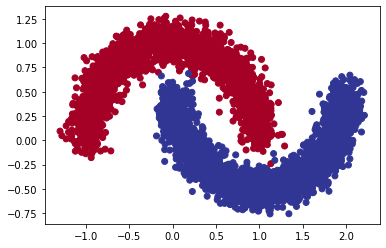

In [9]:
#visualize our moon


plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [10]:
moons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      5000 non-null   float64
 1   X1      5000 non-null   float64
 2   label   5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [11]:
moons.describe()

,X0,X1,label
count,5000.000000,5000.000000,5000.00000
mean,0.500027,0.249207,0.50000
std,0.870514,0.505209,0.50005
min,-1.299891,-0.756660,0.00000
25%,-0.074965,-0.198728,0.00000
50%,0.489201,0.249939,0.50000
75%,1.071162,0.705249,1.00000
max,2.212493,1.275481,1.00000


In [12]:
#split our data into train and test set.

from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#set random seed.
tf.random.set_seed(42)

#Build a model.
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [15]:
#compile the model

model_1.compile(loss = "BinaryCrossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [16]:
#fit the model.

history_1 = model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
125/125 [==============================] - 2s 4ms/step - loss: 0.5782 - accuracy: 0.6350
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8165
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8487
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.3131 - accuracy: 0.8610
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.8690
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.8763
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.8805
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2476 - accuracy: 0.8830
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.8880
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2306 - accura

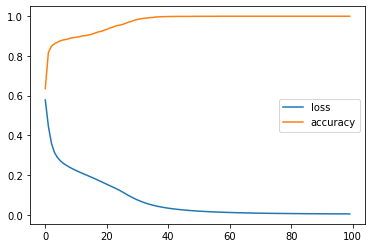

In [17]:
#check the loss curve.

pd.DataFrame(history_1.history).plot()

In [18]:
#let's evaluate our model on test set.

loss, accuracy = model_1.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9970


In [19]:
print(f"model loss on the test set is {loss}")
print(f"model accuracy on the test set is {100*accuracy:.2f}%")

model loss on the test set is 0.008149116300046444
model accuracy on the test set is 99.70%


#lets visualize decission boundary of our model.

#steps in creating decission boundary for binary classification:

1. creating mesh grid.
2. creating x_in.
3. making y_pred.
4. checking for multi class.
5. ploting the decision boundary.

In [20]:
def plot_decision_boundary(X, y, model):

    #creating meshgrid.
    x_min, x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx , yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                          np.linspace(y_min, y_max, 100))
    
    #creating x_in.(We are going to predict on all of these values.)

    x_in = np.c_[xx.ravel(), yy.ravel()]

    #make predictions.

    y_pred = model.predict(x_in)

    #check for multiclass.

    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

    else:
        print("doing binary classification")

        y_pred = np.round(y_pred).reshape(xx.shape)

    #plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


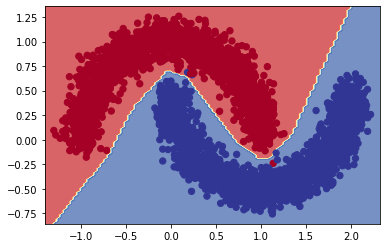

In [21]:
plot_decision_boundary(X_train, y_train, model_1)

doing binary classification
doing binary classification


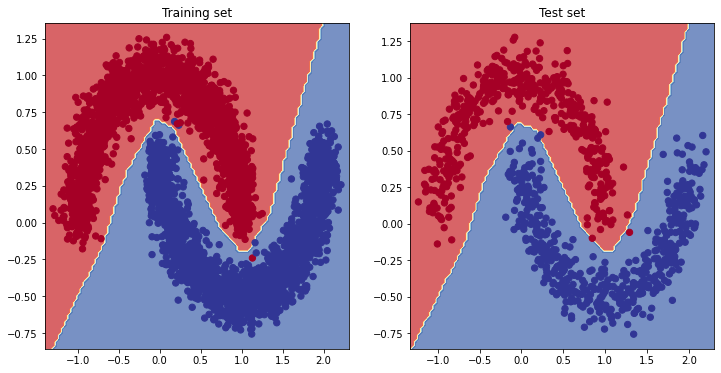

In [22]:
#plot the decission boundary for training set and test set.

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Training set")
plot_decision_boundary(X_train, y_train, model_1)
plt.subplot(1,2,2)
plt.title("Test set")
plot_decision_boundary(X_test, y_test, model_1)

In [23]:
#lets visualize the confusion matrix.

from sklearn.metrics import confusion_matrix

y_pred = model_1.predict(X_test)
y_pred[:10]

array([[3.0177214e-05],
       [3.2481810e-05],
       [3.6180794e-05],
       [9.9985647e-01],
       [9.9985433e-01],
       [1.4141202e-04],
       [9.9996907e-01],
       [9.9999869e-01],
       [3.5533652e-05],
       [9.9970937e-01]], dtype=float32)

In [24]:
y_pred = tf.round(y_pred)
y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[475,   1],
       [  2, 522]])

In [49]:
#let's plot our confusion matrix.
import itertools
figsize = (6, 6)

def plot_confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm.shape[0]
    fig,ax = plt.subplots(figsize = figsize)
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    #create classes.

    classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #label the axes.

    ax.set(title = "confusion matrix",
        xlabel = "predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    #set x-axis labels to bottom.
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust label size.

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    #set threshold for different colors.
    threshold = (cm.max() + cm.min()) / 2

    #plot the text on each cell.
    for i, j in itertools.product(range(cm.shape[0]),
                                range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "White" if cm[i, j] > threshold else "black",
                size = 15)

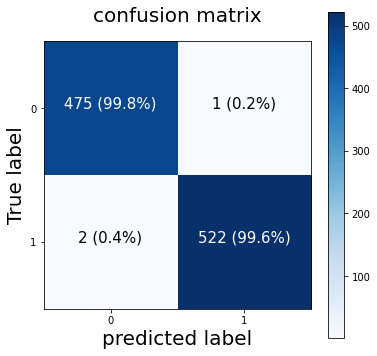

In [50]:
plot_confusion_matrix(y_test, y_pred)

In [55]:
#lets find the ideal learning rate for our model.

#set random seed.

tf.random.set_seed(42)

#create model.

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [56]:
#compile the model.

model_2.compile(loss = "BinaryCrossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [57]:
#create learning rate callback.

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
                                    lambda epoch: 1e-4 * 10**(epoch/20))

In [58]:
#fit the model.

history_lr = model_2.fit(X_train, y_train,
            epochs = 100,
            callbacks = [lr_scheduler])

Epoch 1/100
125/125 [==============================] - 1s 1ms/step - loss: 0.6449 - accuracy: 0.4915 - lr: 1.0000e-04
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.4930 - lr: 1.1220e-04
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.5470 - lr: 1.2589e-04
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.6215 - lr: 1.4125e-04
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.6892 - lr: 1.5849e-04
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7237 - lr: 1.7783e-04
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7607 - lr: 1.9953e-04
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7897 - lr: 2.2387e-04
Epoch 9/100
125/125 [==============================] - 0

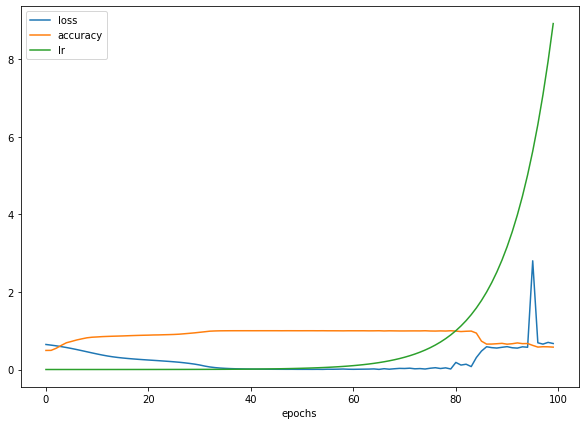

In [59]:
#check out the history

pd.DataFrame(history_lr.history).plot(figsize = (10, 7),
                                      xlabel = "epochs")

Text(0.5, 1.0, 'learning Rate vs Loss')

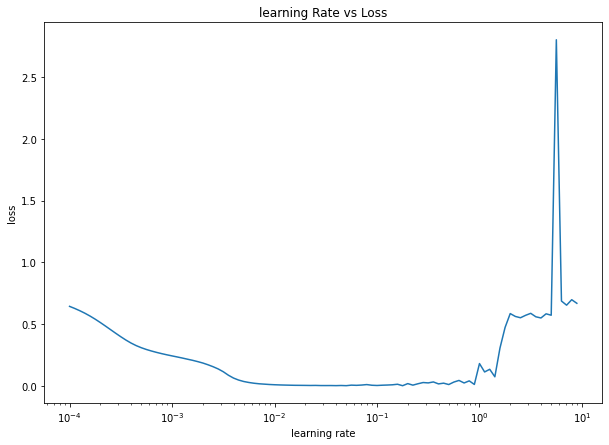

In [61]:
#plot the learning rate versus the loss curve.

lrs = 1e-4 * (10**(np.arange(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_lr.history["loss"])

plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning Rate vs Loss")

Here we can see the ideal learning rate is ~ 0.001 which is the default learing rate for adam optimizer. Since our model is already using this learning rate , we don't need to update it.